In [1]:
# Data manipulation
import pandas as pd 
import numpy as np
# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Read data
df = pd.read_csv('data.csv')
print(df.shape)

(6819, 96)


In [3]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
# determining optimal number of features
# WARNING This step takes 8 minutes!!!
n_features = [5, 10, 15, 20, 25, 30, 35, 40]
for i in n_features:
    # Building the model based feature selection
    select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=i)

    select.fit(X_train, y_train)

    mask = select.get_support()

    X_train_rfe = select.transform(X_train)
    X_test_rfe = select.transform(X_test)

    score = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
    
    print("Test score: {:.3f}".format(score), " number of features: {}".format(i))

Test score: 0.969  number of features: 5
Test score: 0.970  number of features: 10
Test score: 0.970  number of features: 15
Test score: 0.972  number of features: 20
Test score: 0.971  number of features: 25
Test score: 0.970  number of features: 30
Test score: 0.974  number of features: 35
Test score: 0.973  number of features: 40


In [4]:
# Random Forest Classifcation for 15 features
# This takes a while to run as well....
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=15)

select.fit(X_train, y_train)

mask = select.get_support()

X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

print("Test score: {:.3f}".format(score), " number of features: {}".format(15))

features = pd.DataFrame({'features':list(df.iloc[:,1:].keys()), 'select':list(mask)})
features = list(features[features['select']==True]['features'])
features.append('Bankrupt?')

Test score: 0.969  number of features: 15


In [7]:
df = df[features]
df

,Non-industry income and expenditure/revenue,Interest-bearing debt interest rate,Net Value Per Share (A),Persistent EPS in the Last Four Seasons,Net Value Growth Rate,Interest Expense Ratio,Total debt/Total net worth,Borrowing dependency,Net profit before tax/Paid-in capital,Fixed Assets Turnover Frequency,Cash/Total Assets,Net Income to Total Assets,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Equity to Liability,Bankrupt?
0,0.302646,7.250725e-04,0.147950,0.169141,0.000327,0.629951,0.021266,0.390284,0.137757,1.165007e-04,0.004094,0.716845,0.827890,0.026601,0.016469,1
1,0.303556,6.470647e-04,0.182251,0.208944,0.000443,0.635172,0.012502,0.376760,0.168962,7.190000e+08,0.014948,0.795297,0.839969,0.264577,0.020794,1
2,0.302035,7.900790e-04,0.177911,0.180581,0.000396,0.629631,0.021248,0.379093,0.148036,2.650000e+09,0.000991,0.774670,0.836774,0.026555,0.016474,1
3,0.303350,4.490449e-04,0.154187,0.193722,0.000382,0.630228,0.009572,0.379743,0.147561,9.150000e+09,0.018851,0.739555,0.834697,0.026697,0.023982,1
4,0.303475,6.860686e-04,0.167502,0.212537,0.000439,0.636055,0.005150,0.375025,0.167461,2.935211e-04,0.014161,0.795016,0.839973,0.024752,0.035490,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.303510,1.790179e-04,0.175045,0.216602,0.000450,0.631415,0.006655,0.373823,0.171111,1.429781e-04,0.099481,0.799927,0.840359,0.027064,0.029890,0
6815,0.303520,2.370237e-04,0.181324,0.216697,0.000445,0.631489,0.004623,0.372505,0.171805,6.051982e-04,0.080337,0.799748,0.840306,0.027009,0.038284,0
6816,0.303512,0.000000e+00,0.269521,0.210929,0.000435,0.630612,0.001392,0.369637,0.172287,1.024298e-03,0.412885,0.797778,0.840138,0.026791,0.097649,0
6817,0.303498,2.110211e-04,0.213392,0.228326,0.000529,0.630731,0.003816,0.369649,0.182498,2.330013e-04,0.112238,0.811808,0.841084,0.026822,0.044009,0


In [10]:
from imblearn.over_sampling import SMOTE
X=df.drop(labels=['Bankrupt?'], axis=1)
y=df['Bankrupt?']

In [11]:
# Oversampling to combat unabalanced data
oversample = SMOTE()
X,y=oversample.fit_resample(X,y)
#sns.countplot(x=y)

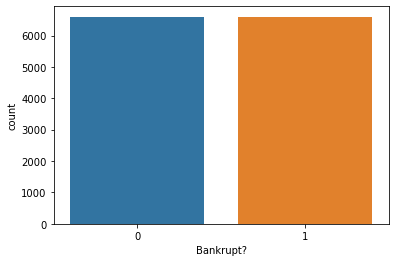

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scale=scaler.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y,test_size=0.3)

In [18]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [19]:
log_reg.score(X_test,y_test)

0.8603535353535353

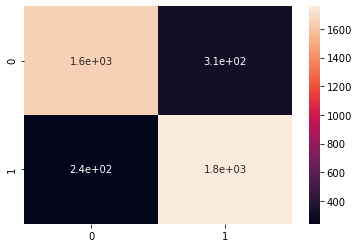

In [20]:
y_pred=log_reg.predict(X_test)
# Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [21]:
# Score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1962
           1       0.85      0.88      0.86      1998

    accuracy                           0.86      3960
   macro avg       0.86      0.86      0.86      3960
weighted avg       0.86      0.86      0.86      3960

